# Importing libraries and data

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [2]:
df = pd.read_csv('vaccination_all_tweets.csv')

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,5.139200e+04,5.139200e+04,51392.000000,5.139200e+04,51392.000000,51392.000000
mean,1.368352e+18,9.821734e+04,1317.481087,1.557942e+04,3.111652,13.440886
std,9.434274e+15,8.288480e+05,5790.473165,4.342808e+04,52.019714,198.096124
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.364518e+18,1.170000e+02,147.000000,3.730000e+02,0.000000,0.000000
50%,1.369941e+18,5.670000e+02,422.000000,2.226000e+03,0.000000,1.000000
75%,1.375333e+18,2.595000e+03,1215.000000,1.155800e+04,1.000000,3.000000
max,1.380438e+18,1.491979e+07,380428.000000,1.205878e+06,7695.000000,22815.000000


In [5]:
df.info

<bound method DataFrame.info of                         id                           user_name  \
0      1340539111971516416                          Rachel Roh   
1      1338158543359250433                         Albert Fong   
2      1337858199140118533                            eli🇱🇹🇪🇺👌   
3      1337855739918835717                       Charles Adler   
4      1337854064604966912                Citizen News Channel   
5      1337852648389832708                                 Dee   
6      1337851215875608579                   Gunther Fehlinger   
7      1337850832256176136                 Dr.Krutika Kuppalli   
8      1337850023531347969                         Erin Despas   
9      1337842295857623042                        Ch.Amjad Ali   
10     1337841934170255365                         Tamer Yazar   
11     1337840331522453507                              VoiceM   
12     1337815730486702087                                WION   
13     1337809196453081088                 D

In [6]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

## Dropping duplicates

In [7]:
df = df.drop_duplicates('text')

In [8]:
df.isna().sum()

id                      0
user_name               0
user_location       11669
user_description     3478
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            11085
source                116
retweets                0
favorites               0
is_retweet              0
dtype: int64

## Removing missing values

In [9]:
df.dropna(inplace=True)

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.isna().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [11]:
df['user_location'].value_counts()

India                                     1035
Toronto, Canada  and Worldwide             733
New Delhi, India                           434
United States                              410
Beijing, China                             383
London, England                            319
Beijing                                    311
Mumbai, India                              271
London                                     264
New Delhi                                  210
USA                                        176
United Kingdom                             171
Moscow, Russia                             150
Los Angeles, CA                            149
Moscow, Russia                             148
New York, NY                               146
Canada                                     144
Malaysia                                   143
Türkiye                                    140
Washington, DC                             139
Pakistan                                   133
Hong Kong    

In [12]:
df['user_description'].value_counts()

George Tsanis – Workout Solutions Health and Fitness Consultants since 1996 – One-on-one and online distance coaching – Toronto, Canada, World                        733
Latest business news and valuable information from China.                                                                                                             189
Official Twitter account of Ilke News Agency /                                                                                                                        139
The largest newspaper in China                                                                                                                                        119
| political | cats | bikes | civil rights | tech | photography                                                                                                        105
News, views and up-to-date reports from Malaysia's premier news source. All that and more at https://t.co/S8jbx5pMaF                                  

In [13]:
df['hashtags'].value_counts()

['Moderna']                                                                                          2019
['Covaxin']                                                                                          1275
['SputnikV']                                                                                         1213
['PfizerBioNTech']                                                                                    674
['COVID19']                                                                                           600
['moderna']                                                                                           502
['OxfordAstraZeneca']                                                                                 477
['Sinopharm']                                                                                         312
['Sinovac']                                                                                           294
['COVAXIN']                                   

In [14]:
df['source'].value_counts()

Twitter Web App                    9373
Twitter for iPhone                 8858
Twitter for Android                7364
TweetDeck                          1425
Twitter for iPad                    685
Instagram                           615
Hootsuite Inc.                      330
Buffer                              142
Twitter Media Studio                139
IFTTT                                91
Sprout Social                        68
Hocalwire Social Share               64
WordPress.com                        56
LinkedIn                             48
Twitter Media Studio - LiveCut       32
Twitter for Mac                      30
IndiaPost                            29
SocialFlow                           27
Tweetbot for iΟS                     25
dlvr.it                              24
Sprinklr                             23
Smarp.                               21
Twidere for Android                  21
Tumblr                               20
Blog2Social APP                      19


# Text cleaning

## function to clean the text

In [15]:
def clean_data(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    
    return text

In [16]:
df['text'] = df['text'].apply(clean_data)
df.head()

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,covidvaccine \n\nstates will start getting cov...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


## Wordcloud - most frequent words

(-0.5, 999.5, 499.5, -0.5)

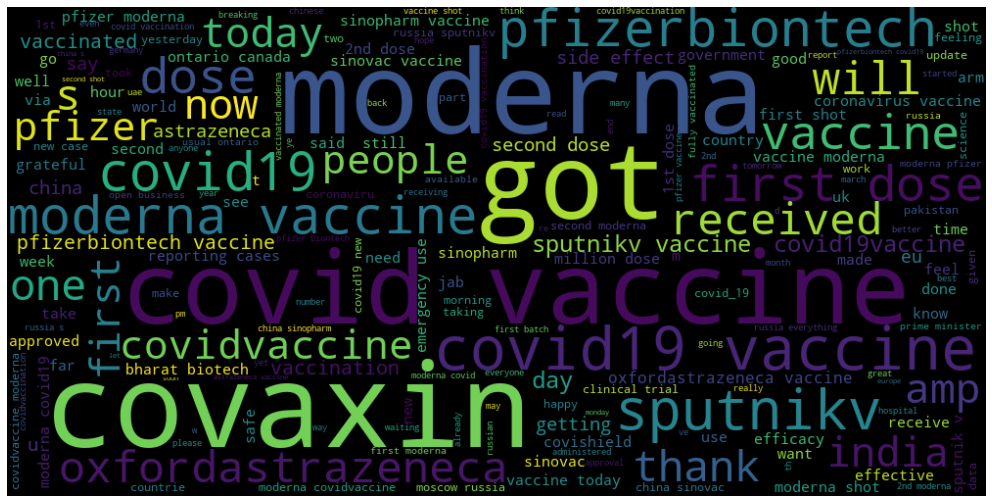

In [17]:
words = ' '.join([word for word in df['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(18,9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

Now we have an idea of the most frequent words in the corpus, it seems that moderna, covid, got, vaccine, covaxin are way more present than the others

# Testing TextBlob for sentiment analysis

In [18]:
from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Subjectivity, polarity, sentiment

In [19]:
df['subjectivity'] = df['text'].apply(get_subjectivity)
df['polarity'] = df['text'].apply(get_polarity)
df['sentiment'] = df['polarity'].apply(get_sentiment)
df.head()

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,subjectivity,polarity,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.125000,0.00,Neutral
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.033333,0.00,Neutral
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,0.500000,-0.10,Negative
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,covidvaccine \n\nstates will start getting cov...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,0.000000,0.00,Neutral
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,0.333333,0.25,Positive


# Visualization

Text(0.5, 0, 'Polarity')

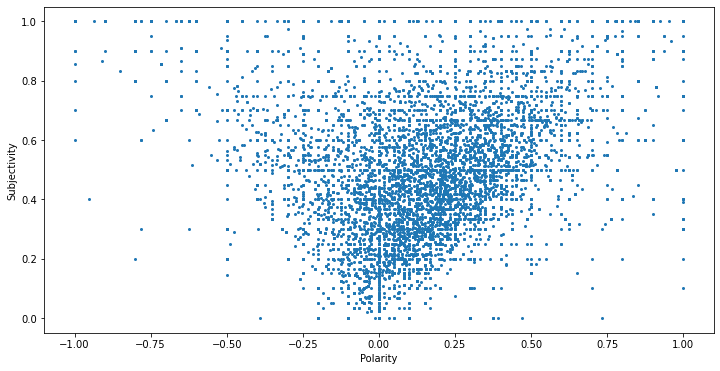

In [20]:
fig = plt.figure(figsize=(12,6))
plt.scatter(df['polarity'], df['subjectivity'], s=4)

plt.ylabel('Subjectivity')
plt.xlabel('Polarity')

In [21]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'subjectivity', 'polarity', 'sentiment'],
      dtype='object')

In [22]:
df.sort_values('polarity', inplace=True)
df

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,subjectivity,polarity,sentiment
33351,1373168684873756673,Terry Crocker⚒⚒🇬🇧🇬🇧,"St Austell, Cornwall","Male 53,Cornish,Massive West Ham fan and also ...",2011-05-09 09:59:59,1854,2101,6251,False,2021-03-20 07:05:01,had the oxfordastrazeneca jab yesterday and ju...,['OxfordAstraZeneca'],Twitter for iPad,0,4,False,1.00,-1.0,Negative
16650,1366392678439657473,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1308,79,358,False,2021-03-01 14:19:35,a patient who has beaten the coronavirus &gt; ...,['coronavirus'],TweetDeck,0,0,False,1.00,-1.0,Negative
23536,1368712202341941255,Jason Kraley,"Philadelphia, PA",Mostly harmless. Toxic when used improperly. I...,2013-04-26 18:05:04,154,934,6415,False,2021-03-07 23:56:33,"day 4 w/moderna (shot 1)..\nugh, i'm miserable...",['Moderna'],Twitter for iPhone,0,4,False,1.00,-1.0,Negative
29490,1371585439551791106,The Hot Stock Lawyer 💎🙌🚀🚀🚀🧧,United States,Elon & Chamath brought me here.\nHuman rights ...,2021-01-27 05:42:53,299,445,5874,False,2021-03-15 22:13:46,"meanwhile, trending messages on stocktwits: ""g...","['trending', 'Stocktwits']",Twitter for Android,3,8,False,0.90,-1.0,Negative
9241,1361608833026715648,Raj Meister,"Leeds, England","Raj Meister is about Alternative Media, where ...",2010-06-29 10:06:10,1351,239,2865,False,2021-02-16 09:30:17,get me sputnikv then we'll talk... otherwise...,"['SputnikV', 'Vaccine']",Twitter for Android,0,0,False,1.00,-1.0,Negative
49161,1379698602612645891,Nikhil K.,"Mumbai, India",Political Commentator. Media Professional. Sco...,2021-03-31 14:12:21,20,324,51,False,2021-04-07 07:32:35,vicious people like you are treating the indi...,"['Indian', 'Covishield', 'Covaxin']",Twitter for Android,0,1,False,1.00,-1.0,Negative
20556,1367125088739418112,Prasenjit Bhakat,"Jhargram,W Bengal,India",Past President (2011-12): Rotary Jhargram Gree...,2009-08-31 02:14:30,390,1658,5071,False,2021-03-03 14:49:55,shocking clinicaltrials of covaxin covid19...,"['clinicaltrials', 'COVID19Vaccine']",Twitter Web App,0,0,False,1.00,-1.0,Negative
43727,1377234732723884032,🍄 Vanilla Dome 🍄,mother earth,"European oversee citizen of India. Atheist, ve...",2011-03-02 06:48:00,340,245,69500,False,2021-03-31 12:22:02,why just using nordstream2 ? the evil 🇷🇺 shou...,"['NordStream2', 'NS1']",Twitter for Android,0,0,False,1.00,-1.0,Negative
28602,1371131251692814345,jeanne smith,London UK,#NHSnotHS2 Artist/philanthropist 4AnimalWelfar...,2011-05-29 21:18:39,2618,3488,37841,False,2021-03-14 16:08:59,outrageous! the eu playing games again with pe...,"['EU', 'FakeNews', 'SarahGilbert']",Twitter for iPhone,0,0,False,1.00,-1.0,Negative
15989,1365256376260427777,vince #FBPE #ABTV #WATON #loveNHS #rejoineu,Uk,"Remainer, Supports publicly run NHS",2015-10-10 17:03:55,2029,3258,14733,False,2021-02-26 11:04:19,astrazenecavaccine the eu have been disgusting...,"['astrazenecavaccine', 'eu', 'oxfordastrazeneca']",Twitter for Android,0,1,False,1.00,-1.0,Negative


<AxesSubplot:>

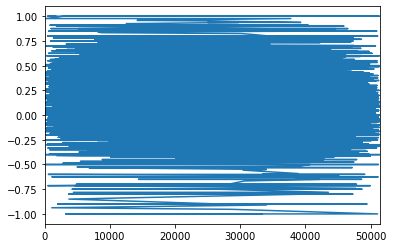

In [23]:
df['polarity'].plot()

In [25]:
df.reset_index(inplace=True)

<AxesSubplot:>

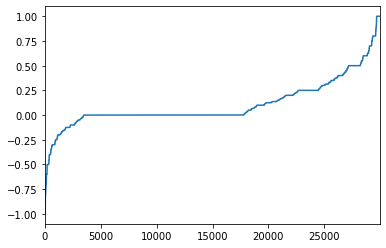

In [26]:
df['polarity'].plot()

Here we can see the polarity of most of the values

In [29]:
df.sort_values('subjectivity', inplace=True)
df

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,index,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,subjectivity,polarity,sentiment
9240,32972,1373074729486020608,IANS Tweets,New Delhi,India's largest independent News Agency,2010-05-08 13:21:45,62715,45,137,True,2021-03-20 00:51:40,a batch of china's sinopharm vaccine was deliv...,"['China', 'Sinopharm', 'Kyrgyzstan']",Twitter Web App,1,1,False,0.0,0.0,Neutral
5499,42802,1377650556001513473,"Brenda Davy, PhD RD",VTHokies - Nutrition,"I tweet about....food, nutrition & health; the...",2011-12-08 19:30:25,2464,678,41233,False,2021-04-01 15:54:22,thank you science &amp; thank you moderna!! \n...,"['Science', 'Moderna']",Twitter for iPhone,1,34,False,0.0,0.0,Neutral
5500,35186,1373614862438428679,tinuSingh,United States,"Stock investing, self employed, world events, ...",2019-11-18 05:56:09,10,16,852,False,2021-03-21 12:37:58,usa has not approved astrazenica covishield y...,['covaxin'],Twitter for iPhone,0,0,False,0.0,0.0,Neutral
5502,18184,1366567687816679426,k.g. Sambrano • fiction • poetry • photography,"Toronto, Ontario",Age-old story of boy lured to city by dizzying...,2017-06-28 02:17:23,7345,53,5637,False,2021-03-02 01:55:01,"""both pfizer-biontech and moderna reported abo...","['Pfizer', 'Moderna']",Twitter Web App,0,0,False,0.0,0.0,Neutral
5503,42831,1377637176758956033,Namrata singh,"27.811873,-82.315487",#bollywooddance #trollhunting #fusionmusic #...,2008-05-07 22:42:45,264,515,5500,False,2021-04-01 15:01:12,fully vaccinated. what should i expect? modern...,"['moderna', 'covidvaccine']",Twitter for iPhone,0,0,False,0.0,0.0,Neutral
5505,18140,1366704012263890946,Plus500,UK,A global financial firm providing online tradi...,2010-05-30 10:20:12,92404,6,218,True,2021-03-02 10:56:43,johnson &amp; johnson (jnj) corona vaccine rol...,"['JNJ', 'AstraZeneca', 'Moderna']",Sprout Social,2,1,False,0.0,0.0,Neutral
5506,42838,1377631149607034880,WalletInvestor.com,https://walletinvestor.com/,"CryptoCurrency, Stock, Forex, Fund and Commodi...",2010-11-22 07:43:27,2294,961,2444,False,2021-04-01 14:37:15,shares of moderna jumped over 10% yesterday - ...,"['Moderna', 'StockMarket']",Twitter Web App,0,1,False,0.0,0.0,Neutral
5507,18143,1366699817628545026,Minister of Civil Rights🎤🇷🇼,#FreeIdamange#Idamange#Rwanda,#FreeHotelRwanda Hero #FreeRusesabagina #FreeM...,2020-09-10 19:11:49,373,221,8644,False,2021-03-02 10:40:03,i got vaccinated 🙄🙄\ntrust the science 😏😏\nmyb...,"['mybodymychoice', 'Rwanda', 'RwOT', 'Covid19'...",Twitter Web App,0,2,False,0.0,0.0,Neutral
5508,18146,1366681614588248066,Aaron Spencer,Planet Earth,I strategize tomorrow today by turning night d...,2009-05-06 19:20:08,331,492,1662,False,2021-03-02 09:27:43,forecast for covid19 vaccine revenue? (note p...,"['covid19', 'Pfizer', 'Moderna']",Twitter Web App,1,2,False,0.0,0.0,Neutral
5497,35179,1373644019545165827,அன்பெழில்,யாதும் ஊரே,நம்புவதை பகிர்ந்து நன்மை செய்வோம்.,2020-01-12 13:29:02,1765,749,7805,False,2021-03-21 14:33:49,continued look at how all the doctors are enco...,"['Covishield', 'Covaxin']",Twitter for iPhone,2,2,False,0.0,0.0,Neutral


<AxesSubplot:>

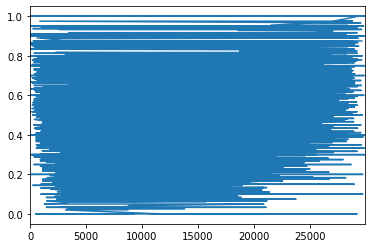

In [31]:
df.reset_index(inplace=True)

<AxesSubplot:>

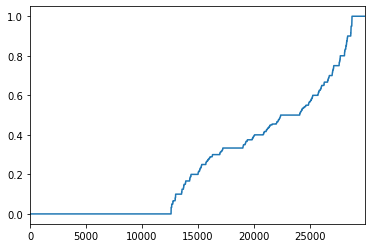

In [32]:
df['subjectivity'].plot()

Here we can see the distribution of the subjectivity